<a href="https://colab.research.google.com/github/dghernandez/decomotor/blob/master/synthetic_example_1_v00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example 1: a single interacting pattern / word

## First, let's import the necessary modules (including uBIAmodule)

In [ ]:
from itertools import product, combinations
import numpy as np
import math
import operator
from matplotlib import pyplot as plt
import functools
def nCr(n,r):
    f = math.factorial
    return f(n) / f(r) / f(n-r)
def list_powerset(lst):
    return functools.reduce(lambda result, x: result + [subset + [x] for subset in result], lst, [[]])
from collections import Counter
import time
from sklearn.utils import shuffle # a bit slow here
import uBIAmodule#you need to upload this module to the working folder

# Defining parameters of underlying probability distribution
Data is generated from log-linear model:
$$\log p(x|\theta) = \sum_i^N \theta_i x_i + \sum_{ij}^N \theta_{ij} x_i x_j + \sum_{ijk}^N \theta_{ijk} x_i x_j x_k +...= \sum_{\nu} \theta_{\nu} \prod_{i\in V_{\nu}} x_i -\log \mathcal{Z}\\$$
$$\theta_i \sim \mathcal{N}(\mu_1, \sigma_1^2),\, \theta_{i_1... i_r} \sim \mathcal{N}(\mu_J, \sigma_J^2)$$

In [ ]:
mu1=-0.7 #for matching firing rate
p1i=np.exp(mu1)/(1.+np.exp(mu1))
sig1=0.1
muJ=1.0#0.5
sigJ=0.2#0.1

#type0: a single J 
#type1: one gauss at 0 
#type2: two gauss for Js at +/- muJ (test this with larger sigJ)
#type3: one gauss at +muJ (test this with -muJ)
distJ_type=0#2

#dimension of data
T=18

#density of interactions per dimension (each variable participates in ~ alfa int)
alfa=2. 
#number of interactions of 2nd, 3rd and 4th order (total 3*Nj)
Nj=int(round(alfa*T/9.))
print(3*Nj)
#number of steps to do path integral for magnetization
n_e=20 
#number of shufflings for significance test
#nmix=100
nmix=10
#number of pattern in full Ising model, after filtering by field
Nmax=1000
#number of samples for inference
M=800

np.random.seed(0)

12


In [ ]:
print(len(list(product(range(2), repeat=T))))

dep2=list(combinations(range(T),2))
dep3=list(combinations(range(T),3))
dep4=list(combinations(range(T),4))
J2=[dep2[i] for i in np.random.choice(range(int(nCr(T,2))), Nj, replace=False)]
J3=[dep3[i] for i in np.random.choice(range(int(nCr(T,3))), Nj, replace=False)]
J4=[dep4[i] for i in np.random.choice(range(int(nCr(T,4))), Nj, replace=False)]
Jp=J2+J3+J4

# Individual biases
J1=np.random.normal(mu1, sig1, T)
# Interactions values
if distJ_type==2:
    Jall=[np.random.normal(np.random.choice([-1,1])*muJ, sigJ) for i in range(3*Nj)]
elif distJ_type==1:
    Jall=[np.random.normal(0., sigJ) for i in range(3*Nj)]
elif distJ_type==0:
    Jp=[(2,3,6)]
    Jall=[muJ]
else:
    Jall=[np.random.normal(muJ, sigJ) for i in range(3*Nj)]

iteTlist=list(product(range(2), repeat=T))
iteT=product(range(2), repeat=T)

# Energies, probabilities for different patterns (~1min; too long, maybe MC sampling instead)
Epatt=[np.dot(i,J1)+np.sum([Jall[j]*np.prod(np.array(i)[np.array(Jp[j])]) for j in range(len(Jall))]) for i in iteT]
#Epatt=[np.dot(i,J1)+np.sum([Jall[j]*np.prod(np.array(i)[np.array(Jp[j])]) for j in range(len(Jall))]) for i in iteTlist]
prob=[np.exp(Epatt[i]) for i in range(2**T)]
Zpar=np.sum(prob)
prob=[pp/Zpar for pp in prob]
print(np.sum(prob))
print(-1*np.dot(prob,np.log(prob)))

for i in range(len(Jall)):
    print(Jp[i],Jall[i])

262144
1.0
11.535228309602633
(2, 3, 6) 1.0


In [ ]:
print(Jp)
print(Jall)

[(2, 3, 6)]
[1.0]


In [ ]:
iteTlist=list(product(range(2), repeat=T))

Epatt0=[np.dot(i,J1) for i in iteTlist]
prob0=[np.exp(Epatt0[i]) for i in range(2**T)]
Zpar0=np.sum(prob0)
prob0=[pp/Zpar0 for pp in prob0]

print("Maximum possible entropy:")
print(T*np.log(2))
print("\nEntropy with biases:")
print(-1*np.dot(prob0,np.log(prob0)))
print("\nEntropy with biases+interactions:")
print(-1*np.dot(prob,np.log(prob)))

Maximum possible entropy:
12.476649250079015

Entropy with biases:
11.495464224441246

Entropy with biases+interactions:
11.535228309602633


# Infering codewords from finite samples using uBIA

In [ ]:
# generating samples from that probability distribution
draw = np.random.choice(range(2**T),M, p=prob)
patt=list(product(range(2), repeat=T))
samples=[patt[i] for i in draw]
#samples0=[patt[i] for i in draw]
#samples_ind=np.random.choice((0,1),(M,Tind),p=[1.-p1i,p1i])
#samples=np.hstack((samples0,samples_ind))
print(samples[:4])

[(0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1), (1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1), (1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1), (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0)]


In [ ]:
hcutoff=0.05

M=len(samples) #number of samples
pi=np.sum(samples,axis=0)
pi=[1.*i/M for i in pi] #empirical individual probabilities

start_time = time.time()

dicset=uBIAmodule.extract_patt(samples)
print(len(dicset))

sorted_patt=uBIAmodule.magn_field(dicset,M,pi)
h0=[sorted_patt[i][1][0] for i in range(Nmax)]
print(len(sorted_patt))

Jvw=uBIAmodule.couplings(sorted_patt, M, pi, Nmax)

results=uBIAmodule.marg_magn_h1ef(h0, Jvw, M)
mi=results[0]
h1ef=results[1]

neopt=uBIAmodule.level_inverse_reg(h0,h1ef,n_e,0.5)
print(neopt)

mm_sorted_patt=uBIAmodule.marg_magn_sorted(sorted_patt,mi,neopt)

print("\n Interactions:")
for i in range(len(Jall)):
    print(Jp[i],Jall[i])

print("\n Sorted by marginal magnetization at e* (c=0.5):")
for pp in mm_sorted_patt[:12]:
    print(pp)

print("\n Sorted by field:")
for pp in sorted_patt[:12]:
    print(pp)
    
mm_sorted_patt20=uBIAmodule.marg_magn_sorted(sorted_patt,mi,5)#n_e
print("\n Sorted by marginal magnetization at 5:")
for pp in mm_sorted_patt20[:12]:
    print(pp)

print("\n--- %s seconds ---" % (time.time() - start_time))#with T=18 ->16s

113220
1000
10

 Interactions:
(2, 3, 6) 1.0

 Sorted by marginal magnetization at e* (c=0.5):
((2, 3, 6), [0.08559511801415481, 261.0716787812499, 89, 55.89000000000001])
((2, 3, 4, 6), [0.04559876042271131, 118.69968824342189, 41, 18.793012500000003])
((13, 17), [0.04143808606768618, 89.67496778125005, 107, 86.13])
((2, 4, 6), [0.03620375257138691, 128.28274906445307, 70, 46.4025])
((2, 3, 5, 6), [0.03360021547365127, 87.6392069934219, 38, 18.793012500000003])
((3, 12, 15), [0.032504261569042014, 41.847173802405294, 24, 38.27705625])
((15, 17), [0.03081855248452573, 39.73529451220698, 73, 88.41375])
((4, 8), [0.027194035466287594, 25.867901892578118, 72, 85.4075])
((1, 2, 3, 6), [0.024922504514575686, 68.20169310761524, 36, 18.932737500000005])
((2, 3, 6, 16), [0.02419127830408279, 71.29633483413456, 36, 18.583425000000002])
((4, 12, 13), [0.022085294376844068, 49.12127386101998, 46, 30.9585375])
((0, 2, 5, 6), [0.02104698620579492, 49.73429239246283, 30, 15.370828125000003])

 Sorte

815.5666638200722
-5034.464042059335
806814


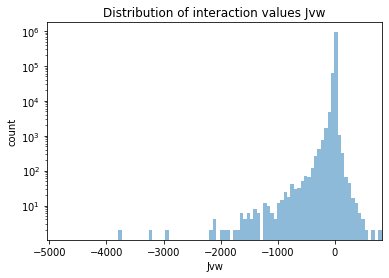

In [ ]:
data=Jvw.flatten()
print(max(data))
print(min(data))
print(np.count_nonzero(data))


bins = np.linspace(math.ceil(min(data)), 
                   math.floor(max(data)),
                   100)
#plt.yscale('log', nonpositive='clip')
plt.yscale('log')
plt.xlim([min(data)-5, max(data)+5])
plt.hist(data, bins=bins, alpha=0.5)
plt.title('Distribution of interaction values Jvw')
plt.xlabel('Jvw')
plt.ylabel('count')

plt.show()

In [ ]:
indexJneg=np.argwhere(Jvw<-2500)
print(indexJneg)
for pp in sorted_patt[:8]:
    print(pp)

print(Jvw[0][1])#(2, 3, 6) and (2, 6)
print(Jvw[0][7])#(2, 3, 6) and (2, 3)
print(Jvw[0][3])#(2, 3, 6) and (2, 3, 4, 6)

[[ 0  1]
 [ 0  7]
 [ 0 20]
 [ 1  0]
 [ 1  2]
 [ 2  1]
 [ 7  0]
 [20  0]]
((2, 3, 6), [261.0716787812499, 89, 55.89000000000001])
((2, 6), [153.70125, 165, 138.0])
((2, 4, 6), [128.28274906445307, 70, 46.4025])
((2, 3, 4, 6), [118.69968824342189, 41, 18.793012500000003])
((13, 17), [89.67496778125005, 107, 86.13])
((2, 3, 5, 6), [87.6392069934219, 38, 18.793012500000003])
((3, 4, 6), [84.00247165124998, 63, 43.578])
((2, 3), [73.93861738281227, 160, 139.72500000000002])
-5034.464042059335
-3737.7951661254237
-1587.4830692835505


# Plot path integral for true patterns

In [ ]:
def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]

indtrue=[]

for jp in Jp:
    ind=find_indices(sorted_patt, lambda e: e[0]== jp)
    print(ind)
    if ind!=[]:
        indtrue.append(ind[0])
#        plt.plot(mi[ind[0]])#,'bs')

#plt.show()
print(indtrue)

[0]
[0]


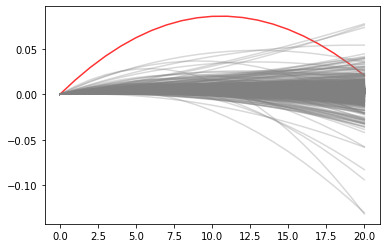

In [ ]:
for j in range(len(mi)):
    if j in indtrue:
        plt.plot(mi[j],'red',alpha=0.8)
    else:
        plt.plot(mi[j],'gray',alpha=0.3)

plt.show()

In [ ]:
#mc[x_,m1_:Exp[-2.67]]:=m1 x^(-0.23)Exp[-0.015 (Log[x]^2)];#see mlevel_nf.nb
#nf=Table[0.005 Sqrt[2]^(i-1),{i,27}];

#mc[n_false=0.3, m1= magnetization 1st]= 1.290 m1

# Significance level?
mc[x_,m1_]:=m1 x^(-0.23)Exp[-0.015 (Log[x]^2)]

mc[n_false, m1= magnetization 1st]= m1 f(nf) (see sacaling between magn and n_false in mlevel_nf.nb)

mc[0.3,1]=1.29

mc[0.1,1]=1.57

In [ ]:
start_time = time.time()

mcx=np.zeros((10,n_e+1)) #ten largest values of marg. magnetizations for codewords in shuffled data (for each level of ee)
mclowx=np.zeros((10,n_e+1))

for nn in range(nmix):#nmix

    #shuffling columns of data (keeping the firing rate fixed)
    tsam=np.transpose(samples)
    tsam_shuf=[shuffle(ti) for ti in tsam]
    sam_shuf=np.transpose(tsam_shuf)

    dicset_s=uBIAmodule.extract_patt(sam_shuf)
    #print(len(dicset_s))

    sorted_patt_s=uBIAmodule.magn_field(dicset_s,M,pi)
    Nmax_s=min(Nmax,len(sorted_patt_s))
    h0_s=[sorted_patt_s[i][1][0] for i in range(Nmax)]
    #print(len(sorted_patt_s))

    Jvw_s=uBIAmodule.couplings(sorted_patt_s, M, pi,Nmax_s)

    results_s=uBIAmodule.marg_magn_h1ef(h0_s, Jvw_s, M)
    mi_s=results_s[0]
    h1ef_s=results_s[1]
    
    for kk in range(n_e+1):
        #how strong can the marginal magnetizetion be for every level of \epsilon?
        mcx[:,kk]+=sorted(mi_s[:,kk],reverse=True)[:10]
        mclowx[:,kk]+=sorted(mi_s[:,kk])[:10]
    
    print(nn,"--- %.2f seconds ---" % (time.time() - start_time))

mcx=(1./nmix)*mcx
mclowx=(1./nmix)*mclowx

print(mcx[0])
print(mclowx[0])

0 --- 20.06 seconds ---
1 --- 39.34 seconds ---
2 --- 58.01 seconds ---
3 --- 76.98 seconds ---
4 --- 96.12 seconds ---
5 --- 116.79 seconds ---
6 --- 136.02 seconds ---
7 --- 154.68 seconds ---
8 --- 174.71 seconds ---
9 --- 194.19 seconds ---
[0.         0.00406575 0.00802    0.01186247 0.01559302 0.01925899
 0.02283168 0.02631094 0.02969668 0.03298879 0.03618721 0.0393035
 0.04246743 0.04559368 0.04866625 0.05169013 0.05484897 0.05801484
 0.06114851 0.06424969 0.06737544]
[ 0.00000000e+00  1.61684595e-04  2.52477666e-04  2.64648399e-04
  1.96034041e-04  3.42319873e-05 -2.78821575e-04 -7.10798927e-04
 -1.26157082e-03 -1.94822421e-03 -2.81097509e-03 -3.80279473e-03
 -4.92352868e-03 -6.21134081e-03 -7.64630651e-03 -9.24763919e-03
 -1.09886590e-02 -1.28690104e-02 -1.48882939e-02 -1.70876690e-02
 -1.95585654e-02]


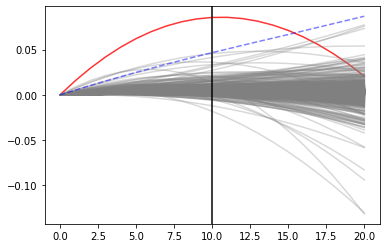

In [ ]:
for j in range(len(mi)):
    if j in indtrue:
        plt.plot(mi[j],'red',alpha=0.8)
    else:
        plt.plot(mi[j],'gray',alpha=0.3)

plt.plot(1.29*mcx[0],'b--',alpha=0.5)
#plt.plot(1.57*mcx[0],'b--',alpha=0.5)
#plt.plot(mclowx[0],'c--',alpha=0.5)
plt.axvline(x=neopt, color='k')#, linestyle='--'

plt.show()